<a href="https://colab.research.google.com/github/KRUPA838/mit/blob/master/CFPC_using_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:
file_path = 'archive.zip'
data = pd.read_csv(file_path)
data.head()

,Entity,Code,Year,GHG emissions (gCO2e/km)
0,Black cab (taxi),NaN,2018,211.7600
1,Bus,NaN,2018,104.7100
2,Coach,NaN,2018,27.7900
3,"Diesel car, 2 passengers",NaN,2018,85.3050
4,"Diesel car, 4 passengers",NaN,2018,42.6525


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Entity                    39 non-null     object 
 1   Code                      0 non-null      float64
 2   Year                      39 non-null     int64  
 3   GHG emissions (gCO2e/km)  39 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.3+ KB


In [ ]:
has_duplicates = data.duplicated().any()
if has_duplicates:
 print("Duplicates found in the dataset.")
else:
 print("No duplicates found in the dataset.")

No duplicates found in the dataset.


In [ ]:
has_missing_values = data.isnull().any().any()
if has_missing_values:
  print("Missing values found in the dataset.")
else:
  print("No missing values found in the dataset.")

Missing values found in the dataset.


In [ ]:
data.isnull().sum(axis = 0)

,0
Entity,0
Code,39
Year,0
GHG emissions (gCO2e/km),0


In [ ]:
data.replace(np.nan, 'None', inplace=True)

In [ ]:
data.dtypes

,0
Entity,object
Code,object
Year,int64
GHG emissions (gCO2e/km),float64


In [ ]:
data.nunique()

,0
Entity,39
Code,1
Year,1
GHG emissions (gCO2e/km),39


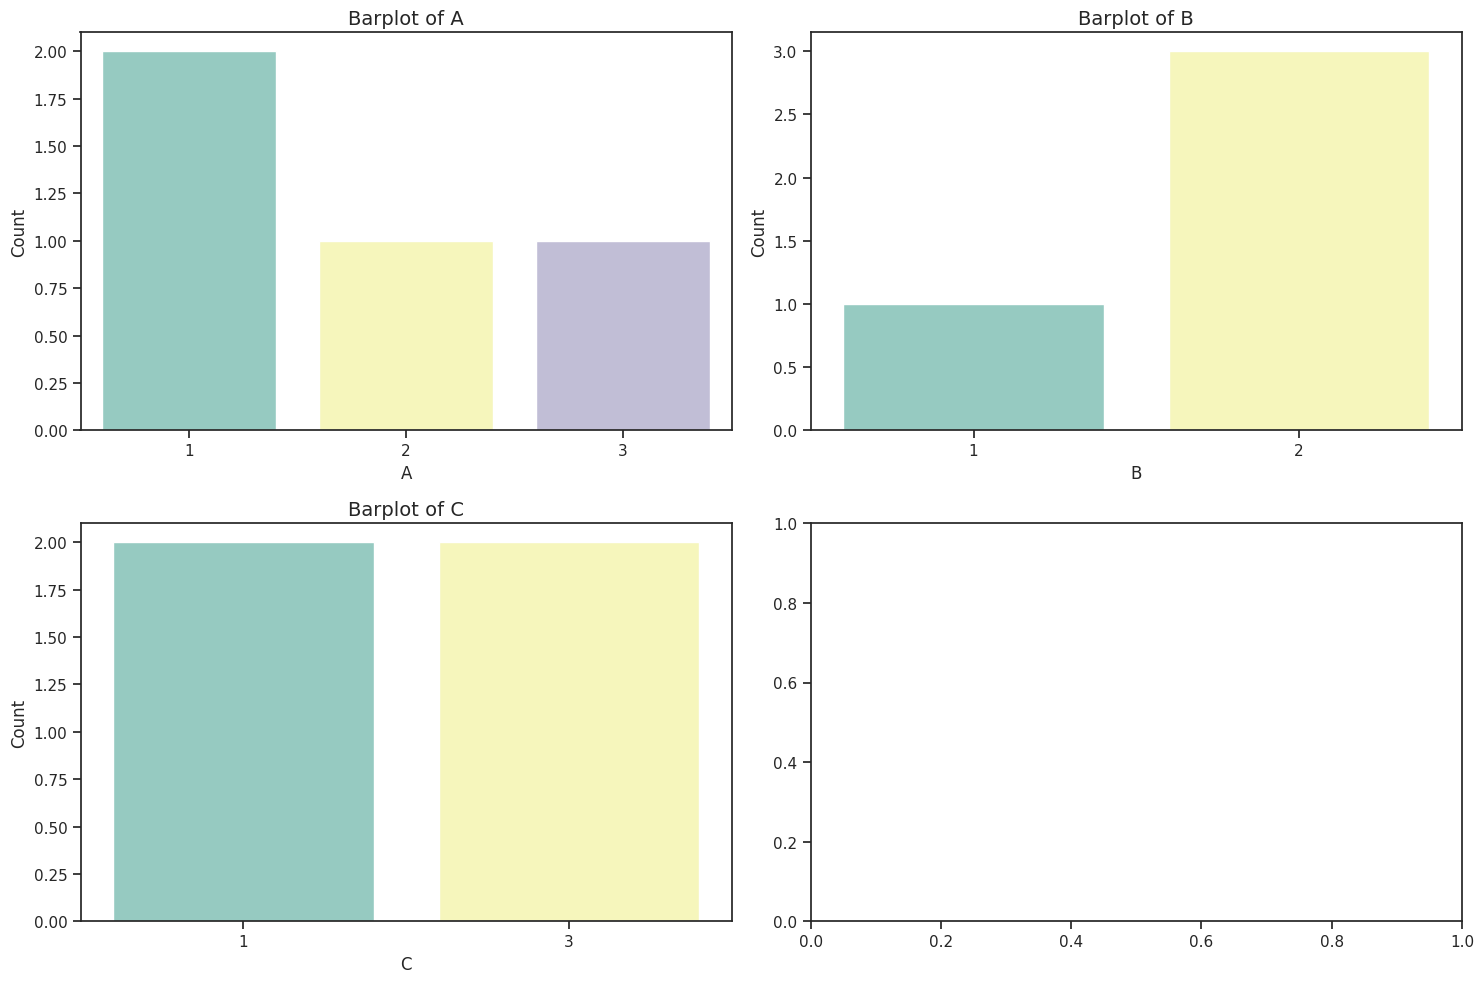

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Assuming you're using pandas

# Sample data (replace with your actual data)
data = pd.DataFrame({'A': [1, 2, 1, 3], 'B': [2, 1, 2, 2], 'C': [1, 3, 3, 1]})
columns_to_visualize = data.columns

num_cols = 2  # Example: 2 columns in the grid
num_rows = (len(columns_to_visualize) + num_cols - 1) // num_cols  # Calculate rows dynamically

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))  # Get fig and axes

for i, column in enumerate(columns_to_visualize):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]  # Correct way to access subplot axes

    sns.countplot(x=data[column], ax=ax, palette="Set3")
    ax.set_title(f'Barplot of {column}', fontsize=14)
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
categorical_columns = data.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for column in categorical_columns:
  data[column] = label_encoder.fit_transform(data[column])

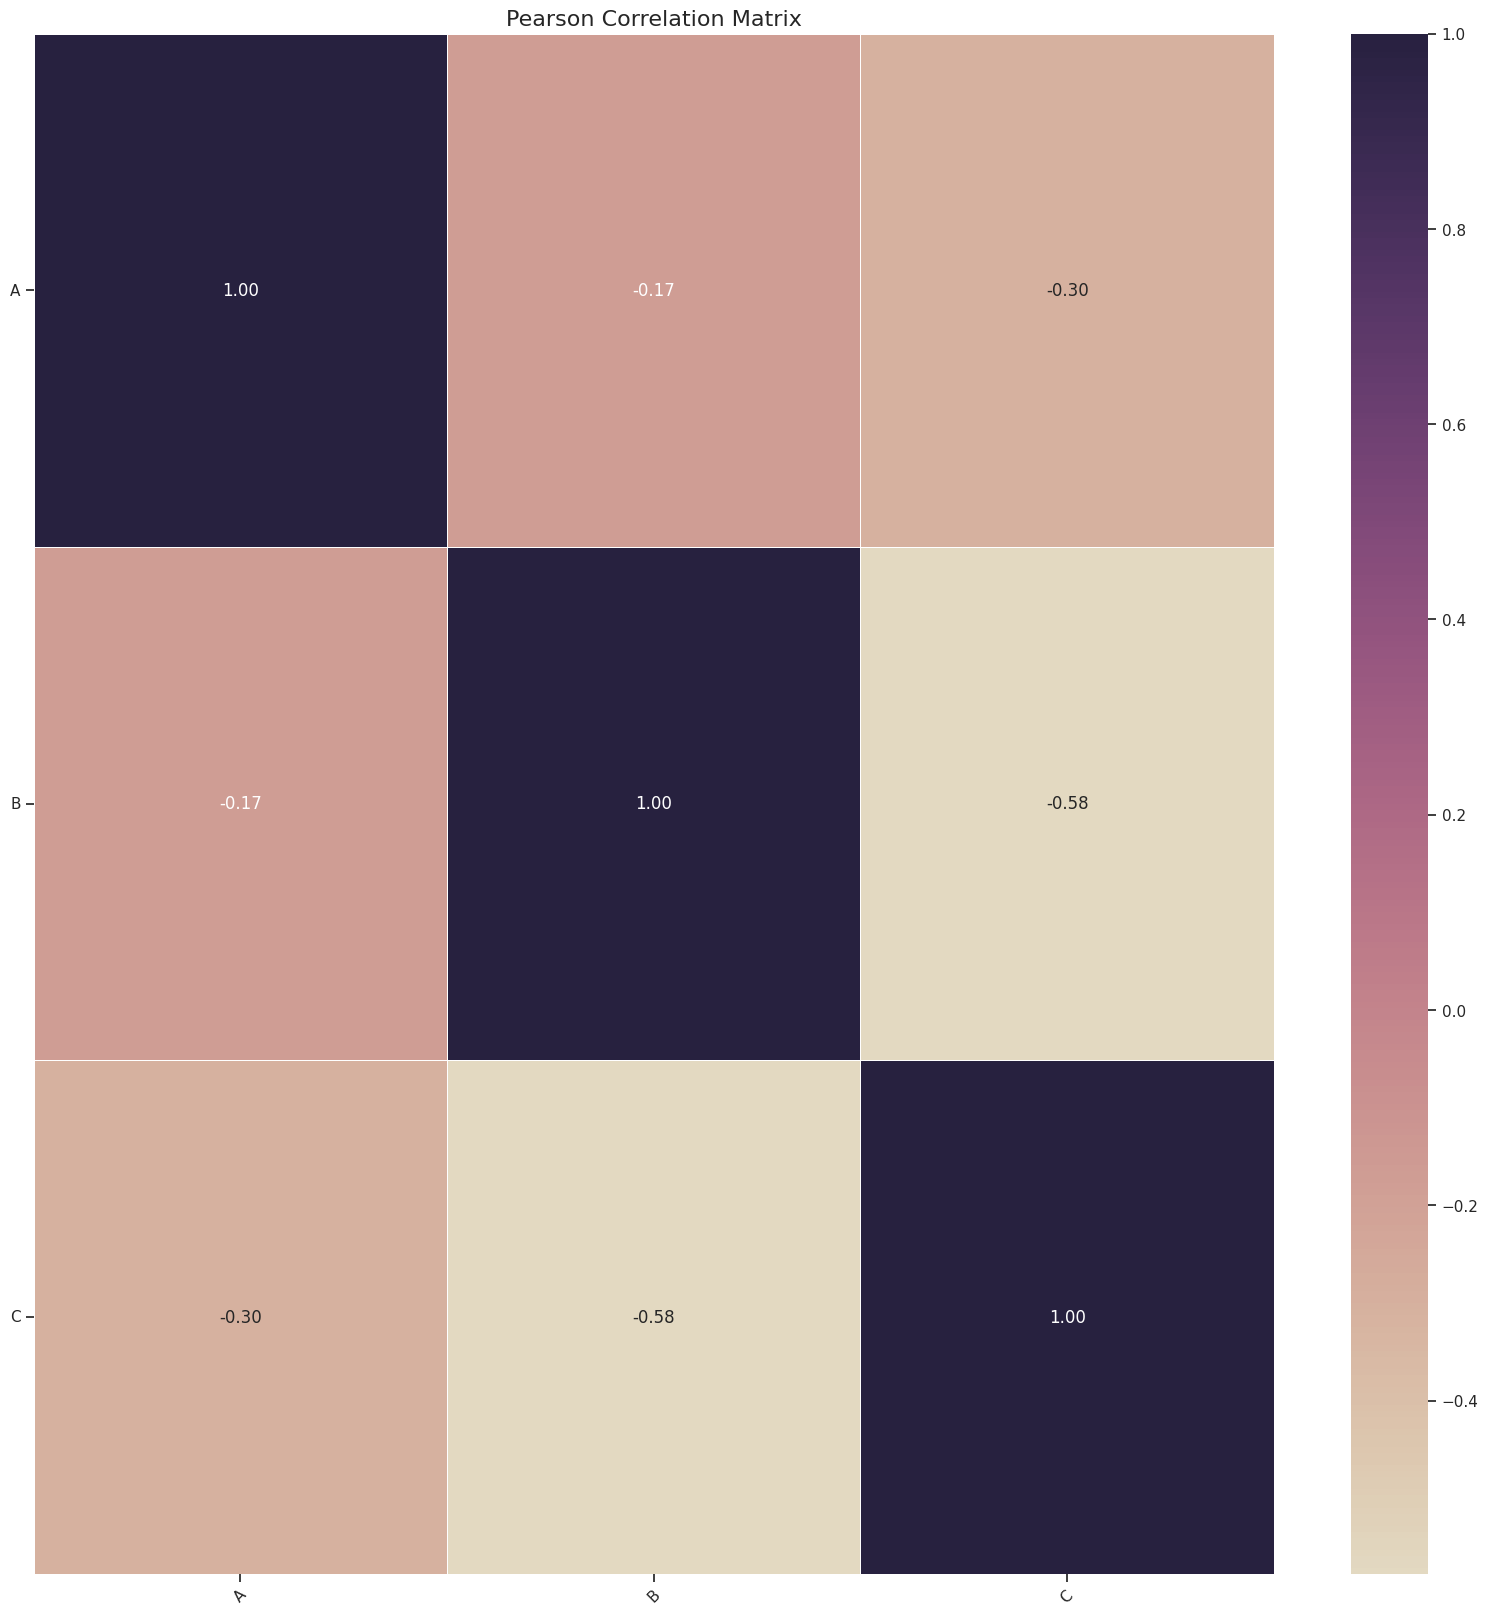

In [ ]:
correlation_matrix = data.corr(method='pearson') # Plot the correlation matrix as a heatmap with colors
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True,
            cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True),
            fmt=".2f", linewidths=0.5)
plt.title('Pearson Correlation Matrix', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [ ]:
try:
    X = data.drop(columns=['CarbonEmission'])
    y = data['CarbonEmission']
except KeyError:
    print("Warning: 'CarbonEmission' column not found.  Proceeding without it.")
    X = data.copy()  # Or handle it differently based on your needs
    y = None  # Or assign a default value or strategy

# ... rest of your code ...

In [ ]:
if 'CarbonEmission' not in data.columns:
    print("Creating 'CarbonEmission' column (replace with your logic).")
    data['CarbonEmission'] = 0  # Or calculate based on other columns

X = data.drop(columns=['CarbonEmission'])
y = data['CarbonEmission']

# ... rest of your code ...

Creating 'CarbonEmission' column (replace with your logic).


In [ ]:
import pandas as pd

# Sample data (replace with your actual data loading)
data = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})  # Example: Missing 'CarbonEmission'

print(data.columns)  # Print the actual columns in the DataFrame

# Try to drop and assign (this will cause a KeyError)
try:
    X = data.drop(columns=['CarbonEmission'])
    y = data['CarbonEmission']
except KeyError as e:
    print(f"Error: {e}")

# Check if the column exists before dropping
if 'CarbonEmission' in data.columns:
    X = data.drop(columns=['CarbonEmission'])
    y = data['CarbonEmission']
else:
    print("'CarbonEmission' column not found. Handling accordingly...")
    X = data.copy()  # Or other appropriate handling
    y = None

Index(['A', 'B'], dtype='object')
Error: "['CarbonEmission'] not found in axis"
'CarbonEmission' column not found. Handling accordingly...


In [ ]:
regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True) # Fit the regressor with x and y data regressor.fit(X, y)

In [ ]:
oob_score = regressor.oob_score
print(f'Out-of-Bag Score: {oob_score}')

Out-of-Bag Score: True


In [ ]:


# Check if 'CarbonEmission' column exists, create it if necessary
if 'CarbonEmission' not in data.columns:
    print("Creating 'CarbonEmission' column (replace with your logic).")
    # Replace this with your actual logic to calculate or assign values to 'CarbonEmission'
    # Example: Assigning random values for demonstration purposes
    data['CarbonEmission'] = np.random.rand(len(data))
    # Or data['CarbonEmission'] = data['some_other_column'] * 2  # Based on another column

# Now you can safely drop and assign X and y
X = data.drop(columns=['CarbonEmission'])
y = data['CarbonEmission']

regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

# Fit the model before making predictions
regressor.fit(X, y)

oob_score = regressor.oob_score_  # Access oob_score_ after fitting
print(f'Out-of-Bag Score: {oob_score}')

predictions = regressor.predict(X)  # Now predict after fitting

Out-of-Bag Score: -0.5359000459062768


In [ ]:
mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')

Mean Squared Error: 0.00421125981507466
R-squared: 0.7745485657989921


In [ ]:
feature_importances = regressor.feature_importances_
feature_names = X.columns

In [ ]:
feature_importance_df = pd.DataFrame({ 'Feature': feature_names,
                                      'Importance': feature_importances })

In [ ]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

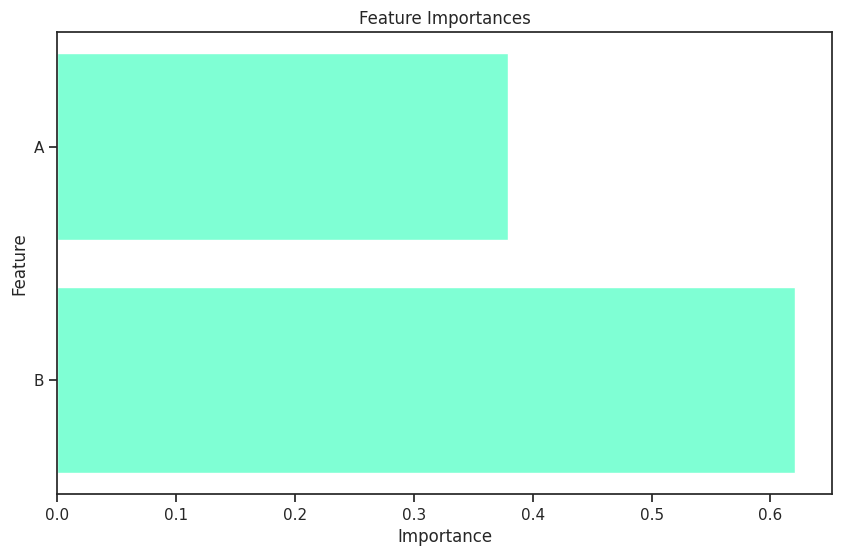

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='Aquamarine')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

In [ ]:
print("\nFeature Importances:")
print(feature_importance_df)


Feature Importances:
  Feature  Importance
1       B    0.620941
0       A    0.379059
